In [1]:
import xml.etree.ElementTree as ET
import os

# download the "ACL Anthology Reference Corpus" and set the path here
acl_path = "./ACL anthology corpus version 2.0/ACL xml/"

def infoOfAYear(year,word):
    """input: year and the term
       output: I)  the number of papers 
               II) the number of papers that have the term in their body 
               III)the number of papers that have the term in their title"""
    fileK=0
    paperNum = paperWwordNum = wordInTitle = 0
    for a in range(ord('A'), ord('Z')+1):     # Each directory contains papers of an ACL related conference
        xmlFiles = []
        path = acl_path + chr(a)+"/"+chr(a)+year+"/"
        if os.path.exists(path):
            xmlFiles = os.listdir(path)
            print(path+"\t"+str(len(xmlFiles)))
            fileK+=len(xmlFiles)
        numOfTitles = 0
        for f in xmlFiles: 
            wordNum=0
            if f.endswith(".xml"):
                tree = ET.parse(path+f)
                root = tree.getroot()
                for child in root:   # Algorithm elements (3 in each file)
                    for ch in child:     # either variant or citationList Element (only one for each Algorithm element) 
                        if len(ch.findall('bodyText'))>0:   # some files are just headers (including only title, author , abstract, notes) 
                            for c in ch:     # sections of papers: title, author, bodyText
                                if c.tag == 'title':   # we should count this only if the file has bodyText
                                    numOfTitles += 1
                                    if c.text is not None and word in c.text.lower():
                                        wordInTitle+=1
                                if c.text is not None:
                                    if word in c.text.lower(): # or "multi-word" in c.text.lower():
                                        #if ch.find('title') is not None:
                                            #print(ch.find('title').text)
                                        wordNum+=1                     
            if wordNum>1:
                paperWwordNum += 1
        paperNum += numOfTitles
    print(paperNum, paperWwordNum, wordInTitle)
    return paperNum, paperWwordNum, wordInTitle

In [ ]:
# the range of years displayed on the plot 
# The span of years is gathered here based on the names of directories in the corpus

start = 1980
end = 2016

labels = [str(y) for y in range(start,end)]
years = [y[-2:] for y in labels]

query = "multiword" # here you specify the query term
queryRatios = []
queryInTitleRatios = []
for y in years:
    q = infoOfAYear(y, query)
    queryRatios.append(float(q[1])/q[0])
    queryInTitleRatios.append(float(q[2])/q[0])


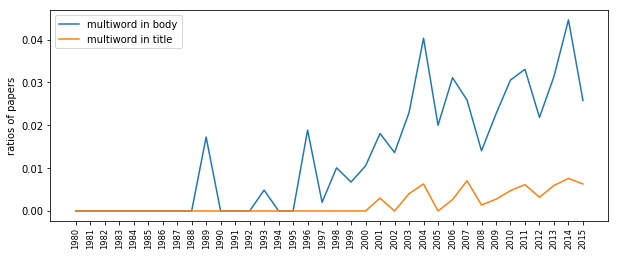

In [5]:
import matplotlib.pyplot as plt

#fig_size=plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

plt.plot(range(0,36),queryRatios,label='multiword in body')
plt.plot(range(0,36),queryInTitleRatios, label='multiword in title') 
plt.ylabel('ratios of papers')
plt.xticks(range(len(queryRatios)), labels, size='small', rotation='vertical')
plt.subplots_adjust(bottom=0.15)
plt.legend()
plt.show()
